In [1]:
import os 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Load Data

In [14]:
path = '../data/processed'
df = pd.read_pickle(os.path.join(path,'transactions.pkl'))
articles = pd.read_csv('../data/raw/articles.csv')
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,2,663713001,0.0508,2
1,2018-09-20,2,541518023,0.0305,2
2,2018-09-20,7,505221004,0.0152,2
3,2018-09-20,7,685687003,0.0169,2
4,2018-09-20,7,685687004,0.0169,2


## To-Do List
- Histogram of purchase per transactions
- Repurchase Duration
- Find recency
- Ratio of Inactive Customers

### Histogram of purchase per transactions

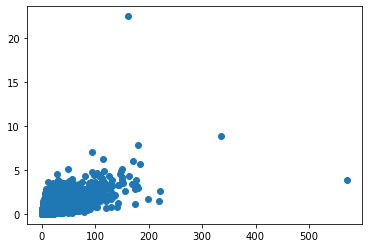

In [26]:
temp = df[['t_dat','customer_id','article_id','price','sales_channel_id']]
temp = temp.groupby(['t_dat','customer_id','sales_channel_id']).agg({'article_id':'count','price':sum})

plt.scatter(temp['article_id'],temp['price'])
plt.show()

In [31]:
temp.article_id.describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

count   9174457.0000
mean          3.4649
std           3.5898
min           1.0000
10%           1.0000
25%           1.0000
50%           2.0000
75%           4.0000
99%          18.0000
max         570.0000
Name: article_id, dtype: float64

In [27]:
temp[temp.article_id >200]

,,,article_id,price
t_dat,customer_id,sales_channel_id,,
2018-10-14,1114704,1,570,3.8567
2018-10-15,195309,2,220,1.5238
2018-12-17,1044421,2,336,8.8435
2019-01-13,530195,2,221,2.5878


In [35]:
df[(df.customer_id==1114704)].drop_duplicates(subset=['t_dat','customer_id'])

,t_dat,customer_id,article_id,price,sales_channel_id
1085934,2018-10-12,1114704,506110001,0.0254,2
1177871,2018-10-14,1114704,678342001,0.0068,1
1315527,2018-10-17,1114704,561445005,0.0072,1
2585981,2018-11-17,1114704,661306008,0.0169,2
3194508,2018-11-28,1114704,637515001,0.0339,2
4022005,2018-12-21,1114704,684895001,0.0118,1
5185421,2019-01-19,1114704,241412043,0.0186,1
5588557,2019-01-29,1114704,654100001,0.0085,2
5868292,2019-02-05,1114704,679482001,0.0847,2
6969764,2019-03-04,1114704,594834016,0.0424,2


In [28]:
df[(df.t_dat=='2018-12-17')&((df.customer_id==1044421))].groupby('article_id').agg({'article_id':'count','price':[sum]})

,article_id,price
,count,sum
article_id,,
188183012,8,0.2439
384851013,8,0.0948
445419003,8,0.1897
445419011,8,0.1219
461327001,8,0.4066
490113004,8,0.1626
495560002,8,0.4744
497247003,8,0.1219


We may romove those transactions that have over 200 articles.

### Repurchase Duration

In [32]:
temp = df[['t_dat','customer_id']].drop_duplicates(subset=['t_dat','customer_id'])\
            .sort_values(by=['customer_id','t_dat'])\
            .reset_index(drop=True)
temp['Repurchase_duration'] = temp.groupby('customer_id')['t_dat'].diff() / np.timedelta64(1, 'D')
temp.head()

,t_dat,customer_id,Repurchase_duration
0,2018-12-27,0,NaN
1,2019-05-02,0,126.0000
2,2019-05-25,0,23.0000
3,2019-07-25,0,61.0000
4,2019-09-18,0,55.0000


In [33]:
temp['Repurchase_duration'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

count   7717898.0000
mean         48.2560
std          71.6826
min           1.0000
10%           2.0000
25%           7.0000
50%          22.0000
75%          58.0000
90%         124.0000
99%         364.0000
max         731.0000
Name: Repurchase_duration, dtype: float64

### Find recency

### Ratio of Inactive Customers

In [36]:
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64